In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (16,10)

In [3]:
mhcnuggets = pd.read_csv('../data/epitope-predictions/mhcnuggets.csv')
print(f'Number of MHCnuggets binders: {len(mhcnuggets[mhcnuggets["ic50"] < 500])}')

mhcflurry = pd.read_csv('../data/epitope-predictions/mhcflurry.csv')
print(f'Number of MHCFlurry binders: {len(mhcflurry[mhcflurry["prediction"] < 500])}')

netmhcpan = pd.read_csv('../data/epitope-predictions/netmhcpan.csv')
print(f'Number of NetMHCPan binders: {len(netmhcpan[netmhcpan["ic50"] < 500])}')

Number of MHCnuggets binders: 323
Number of MHCFlurry binders: 554
Number of NetMHCPan binders: 257


In [4]:
mhcnuggets_binders = mhcnuggets[mhcnuggets['ic50'] < 500]
print(f'Binders per alleles\n {mhcnuggets_binders.groupby("allele").size()}')

Binders per alleles
 allele
HLA-A02:06     30
HLA-A11:01     61
HLA-A23:01     15
HLA-A30:01     56
HLA-A32:01      1
HLA-A33:01     36
HLA-B07:02     17
HLA-B08:01     18
HLA-B15:01     63
HLA-B40:01      7
HLA-B44:02      1
HLA-B53:01      9
HLA-B58:01      9
dtype: int64


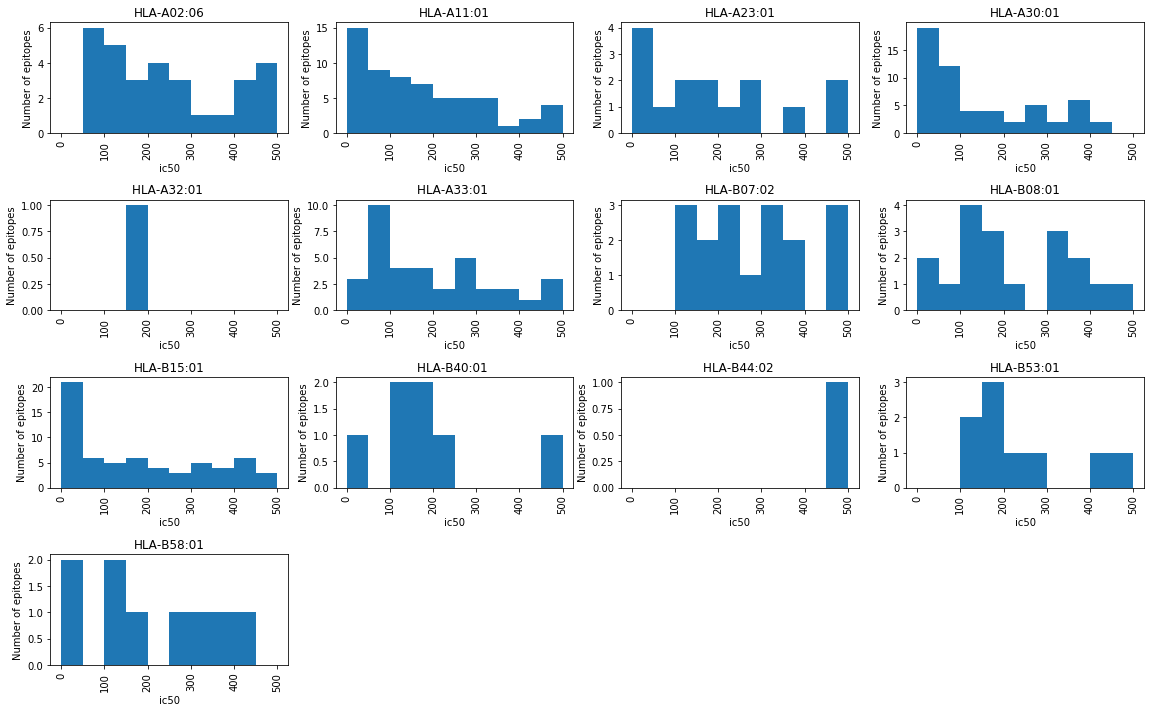

In [8]:
# ic50 distribution per alelles
# -> helps determining which alleles have strong binders and which ones don't
axarr = mhcnuggets_binders['ic50'].hist(by=mhcnuggets_binders['allele'], range=[0, 500])
for ax in axarr.flatten():
    ax.set_xlabel("ic50")
    ax.set_ylabel("Number of epitopes")
plt.tight_layout()

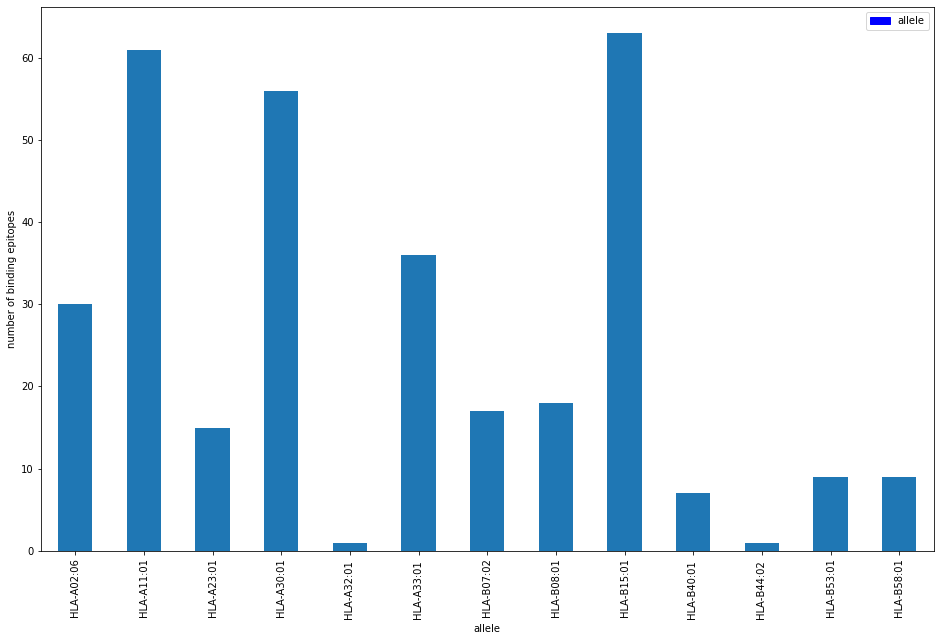

In [57]:
# plot number of binders per allele
mhcnuggets_binders.groupby("allele").count()['ic50'].plot.bar()
plt.ylabel('number of binding epitopes')
binder_patch = mpatches.Patch(color='blue', label='allele')
plt.legend(handles=[binder_patch])